# Hebb's learning
- Basic neuron
  - load XML, rescale
  - generate random values that are linearly separable in R^2 (0;1)
- plot points
- learn
- plot points with neuron's line

In [83]:
import numpy as np
import math
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [99]:
plt.style.use("ggplot")

In [187]:
def parse_xml(filename):
    def parse_inputs(perceptron):
        for input in perceptron.findall("inputDescriptions"):
            yield {
                'min': float(input.find('minimum').text),
                'max': float(input.find('maximum').text),
                'name': input.find('name').text
            }
            
    def parse_dataset_x(dataset):
        for element in dataset.findall("element"):
            x = list(map(lambda value: float(value.text), element.find("inputs").findall("value")))
            yield x
            
    def parse_dataset_y(dataset):
        for element in dataset.findall("element"):
            y = float(element.find("output").text)
            yield y
    
    tree = ET.parse(f"{filename}")
    root = tree.getroot()
    inputs = list(parse_inputs(root.find("perceptron")))
    train_x = list(parse_dataset_x(root.find("TrainSet")))
    train_y = list(parse_dataset_y(root.find("TrainSet")))
    test = list(parse_dataset_x(root.find("TestSet")))
    
    return (inputs, (train_x, train_y), test)

In [196]:
def plot_train(x, y):
    x0 = list(map(lambda x: x[0], x))
    x1 = list(map(lambda x: x[1], x))
    
    x0a, x1a = [], [] # 0
    x0b, x1b = [], [] # 1
    for xi, y in zip(x, y):
        if y == 0:
            x0a.append(xi[0])
            x1a.append(xi[1])
        else:
            x0b.append(xi[0])
            x1b.append(xi[1])
    
    plt.scatter(x0a, x1a, marker="o", label="train 0")
    plt.scatter(x0b, x1b, marker="x", label="train 1")
    
def plot_test(x):
    x0 = list(map(lambda x: x[0], x))
    x1 = list(map(lambda x: x[1], x))
    plt.scatter(x0, x1, s=100, marker="$?$", label="test")

In [183]:
def rescale(inputs, dataset):    
    result = []
    for x in dataset:
        record = []
        for i, xi in enumerate(x):
            min = inputs[i]["min"]
            max = inputs[i]["max"]
            record.append((xi - min) / (max - min))
        result.append(record)
    return result

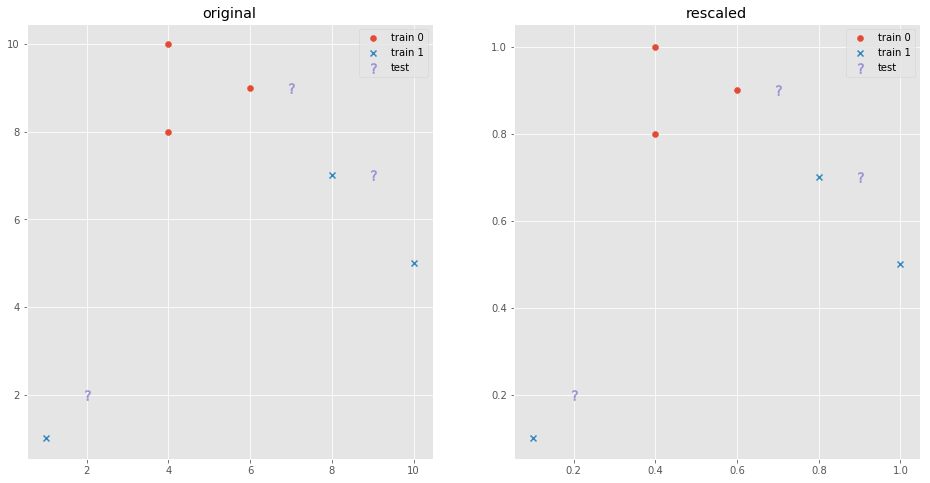

In [198]:
def solve(filename):
    inputs, (train_x, train_y), test = parse_xml(filename)
    
    #print(inputs, train_x, train_y, test)
    
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.title("original")
    plot_train(train_x, train_y)
    plot_test(test)
    plt.legend()
    
    train_x = rescale(inputs, train_x)
    test = rescale(inputs, test)
    
    plt.subplot(1, 2, 2)
    plt.title("rescaled")
    plot_train(train_x, train_y)
    plot_test(test)
    plt.legend()
    plt.show()
    
solve("obdelnik_rozsah.xml")

In [37]:
class Neuron:
    def __init__(self, n):
        self.n = n
        self.w = np.random.rand(n + 1)
        self.w[0] = 1
        
    def train(self, x):
        pass
    
    def predict(self, input):
        x = np.append([1], input)
        
        value = np.dot(self.w, x)
        value = self._sign(value)
        return value
    
    def _sign(self, x):
        return 0 if x <= 0 else 1

In [16]:
a = np.empty(3)
a = np.append([1], a)
x = np.array([1,2])
print(a)
print(x)
#np.copyto(a, x)

[1.00000000e+000 1.17707925e-311 4.94065646e-324 1.00000000e+000]
[1 2]


In [39]:
neuron = Neuron(2)

In [26]:
neuron.w

array([1.        , 0.29564628, 0.14026763])

In [42]:
neuron.predict([-10, -1])

0